In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df= pd.read_csv("tripadvisor_hotel_reviews.csv")
df.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [3]:
df.shape

(20491, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
(df.isna().sum()/len(df))*100

Review    0.0
Rating    0.0
dtype: float64

In [6]:
df.Rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

Text(0.5, 1.0, 'Ratings of Hotels')

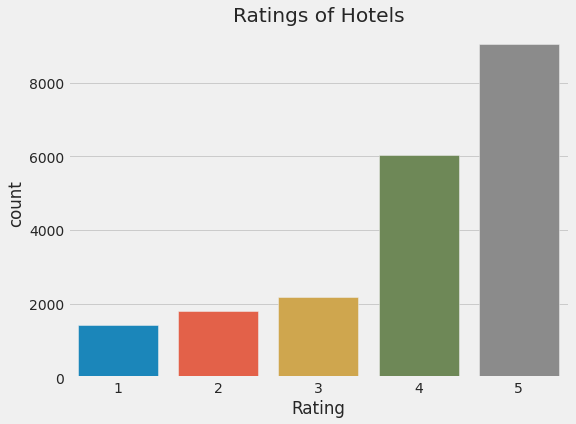

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(df["Rating"])
plt.title("Ratings of Hotels")

<AxesSubplot:>

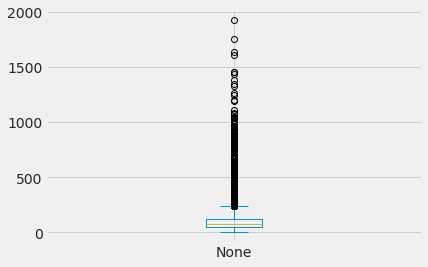

In [8]:
#Calculate review lengths
review_len = pd.Series([len(review.split()) for review in df['Review']])

# The distribution of review text lengths
review_len.plot(kind='box')

<AxesSubplot:ylabel='Count'>

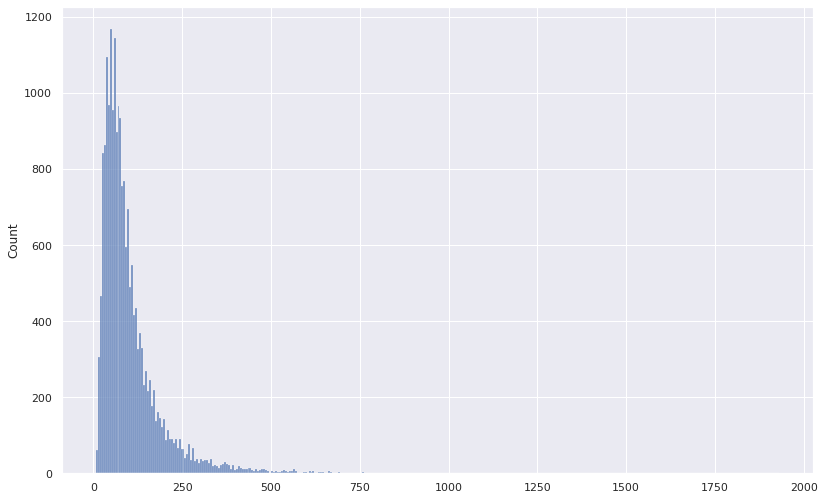

In [9]:
sns.set_theme(
    context='notebook',
    style='darkgrid',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
)
plt.figure(figsize=(12,8))
sns.histplot(review_len)

count    9054.000000
mean       93.963773
std        90.977999
min         7.000000
25%        44.000000
50%        69.000000
75%       111.000000
max      1755.000000
Name: Length, dtype: float64

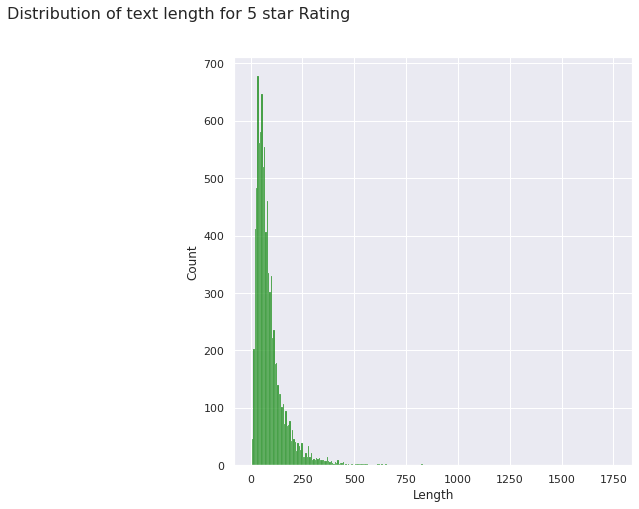

In [11]:
fig = plt.figure(figsize=(14,7))
df["Length"] = df.Review.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['Rating'] ==5]['Length'], ax=ax1, color='green')
fig.suptitle('Distribution of text length for 5 star Rating', fontsize= 16)
display(df.Length[df.Rating==5].describe())

count    1421.000000
mean      112.365236
std        99.834855
min        12.000000
25%        51.000000
50%        82.000000
75%       137.000000
max       954.000000
Name: Length, dtype: float64

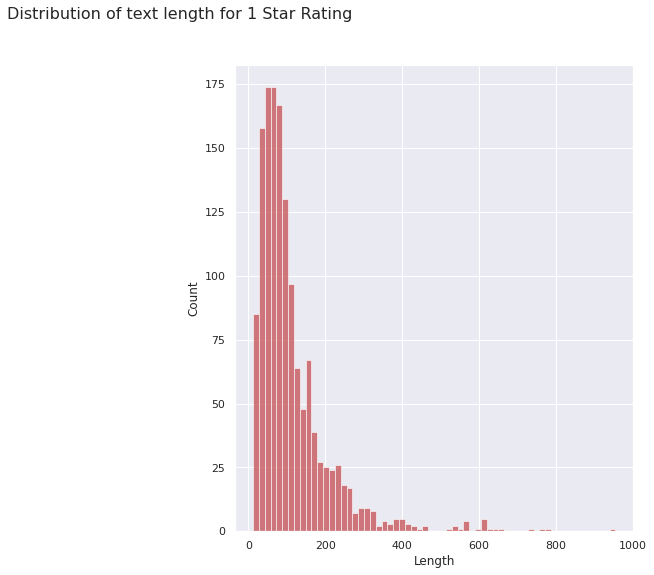

In [12]:
fig2 = plt.figure(figsize=(14,8))
ax2 = fig2.add_subplot(122)
sns.histplot(df[df["Rating"]==1]["Length"], ax=ax2, color='r')
fig2.suptitle("Distribution of text length for 1 Star Rating", fontsize=16)
display(df.Length[df.Rating==1].describe())

In [13]:
!pip install wordcloud

     |████████████████████████████████| 371 kB 2.3 MB/s eta 0:00:01


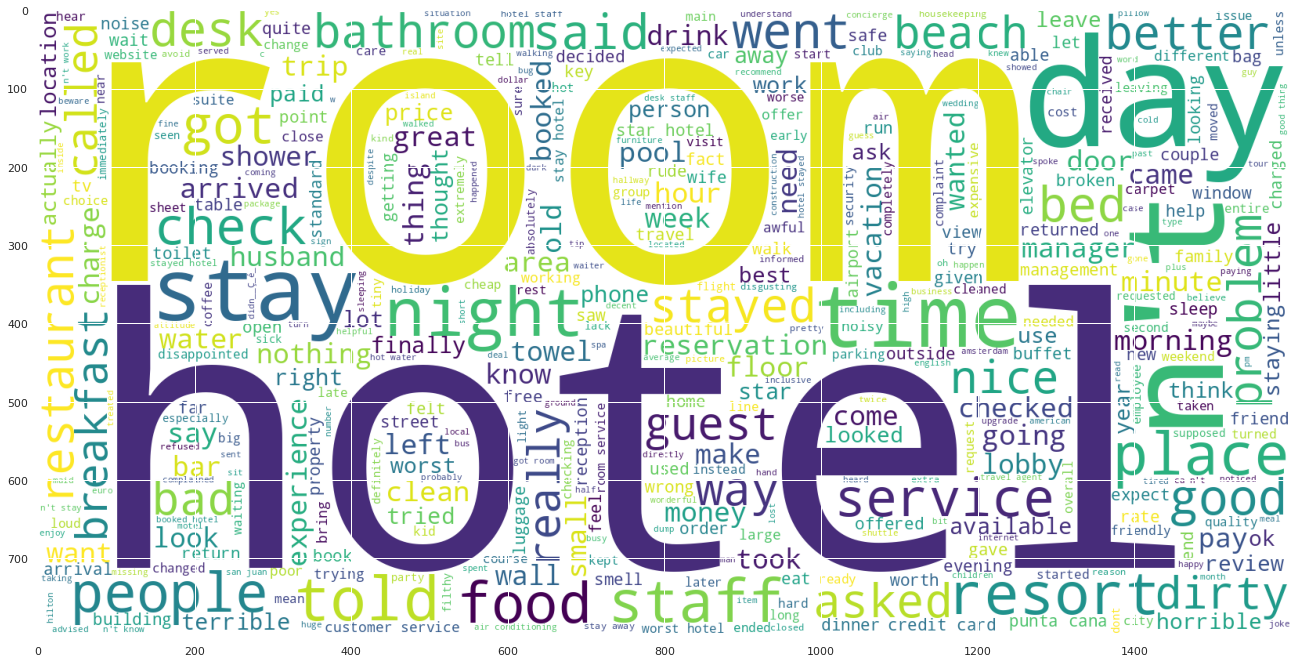

In [14]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc1 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600, background_color="white").generate(" ".join(df[df["Rating"]==1].Review))
plt.imshow(wc1)
                                                                                                             

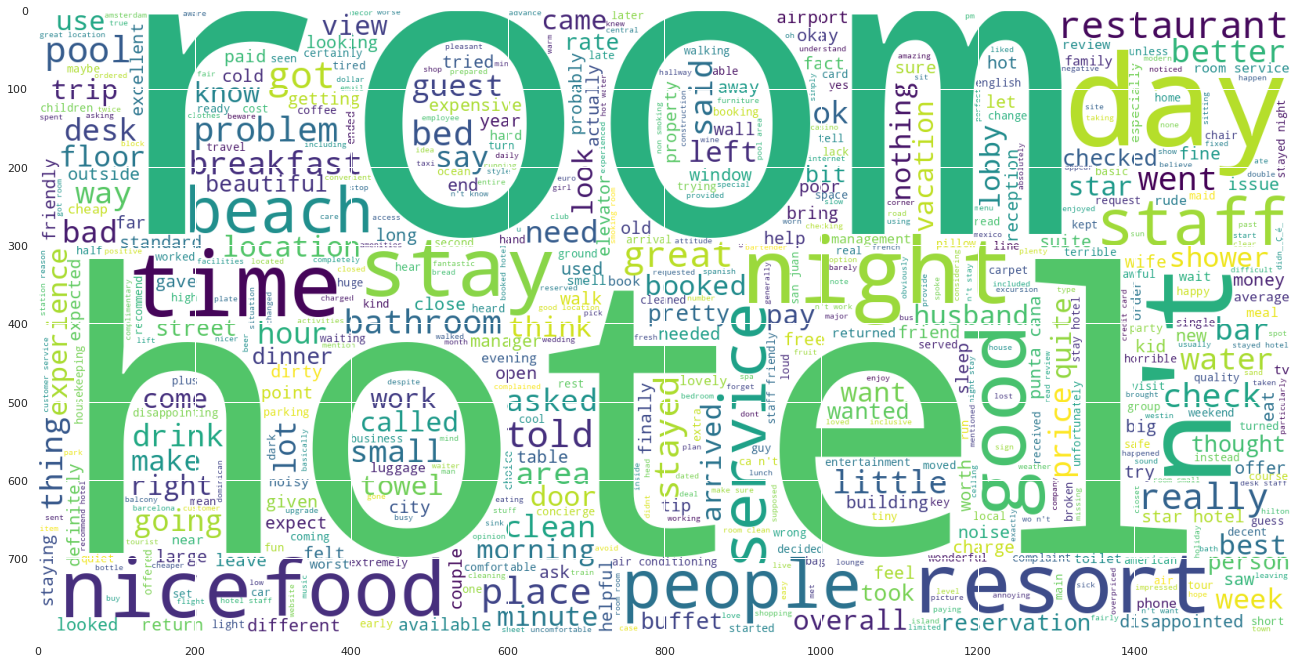

In [15]:
plt.figure(figsize=(20,20))
wc2 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600, background_color="white").generate(" ".join(df[df["Rating"]==2].Review))
plt.imshow(wc2)

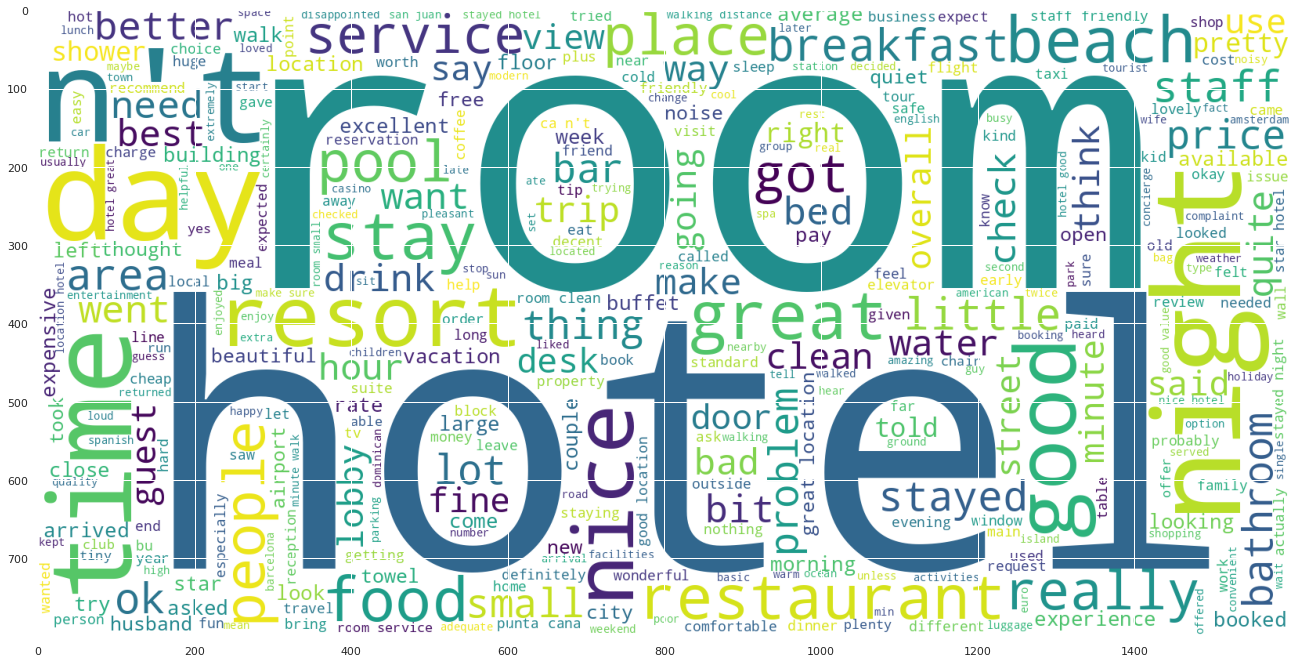

In [16]:
plt.figure(figsize=(20,20))
wc3 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600, background_color="white").generate(" ".join(df[df["Rating"]==3].Review))
plt.imshow(wc3)

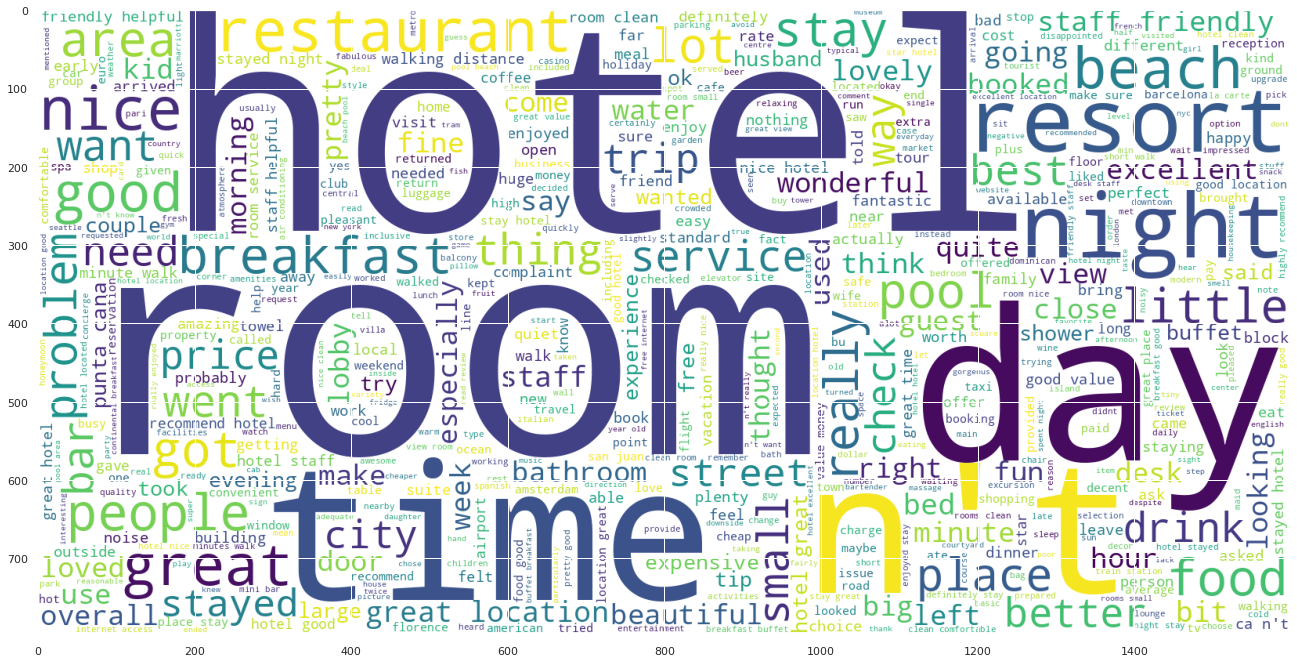

In [17]:
plt.figure(figsize=(20,20))
wc4 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600, background_color="white").generate(" ".join(df[df["Rating"]==4].Review))
plt.imshow(wc4)

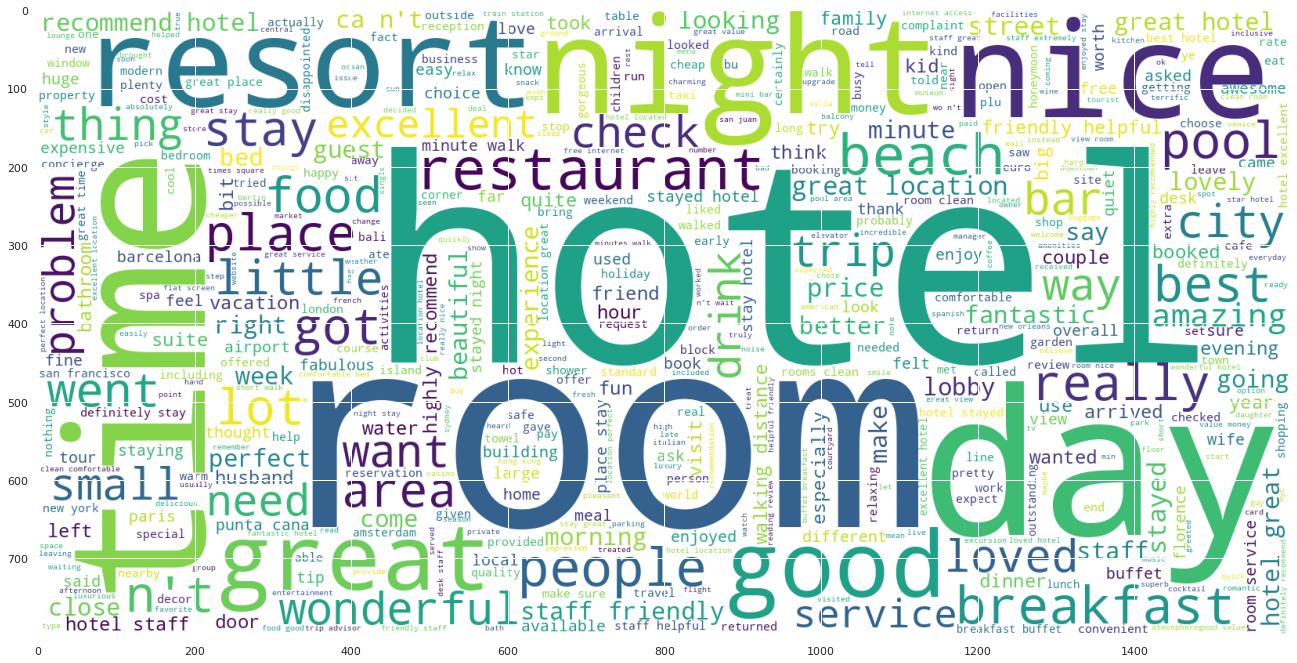

In [18]:
plt.figure(figsize=(20,20))
wc5 = WordCloud(max_words=2000, min_font_size=10, height=800, width=1600, background_color="white").generate(" ".join(df[df["Rating"]==5].Review))
plt.imshow(wc5)

In [71]:
# Function for cleaning Review
def standardize_text(df , field):
    df[field] = df[field].str.replace(r"http\S+", "")
    df[field] = df[field].str.replace(r"http","")
    df[field] = df[field].str.replace(r"@/S+","")
    df[field] = df[field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\n]", " ")
    df[field] = df[field].str.replace(r"@"," at ")
    df[field] = df[field].str.lower()
    return df

In [72]:
standardize_text(df , "Review")

Review  Rating  Lenght  \
0      nicehotelexpensiveparkinggotgooddealstayhotela...       4      87   
1      oknothingspecialchargediamondmemberhiltondecid...       2     250   
2      niceroomsnot4experiencehotelmonacoseattlegoodh...       3     217   
3      unique,greatstay,wonderfultimehotelmonaco,loca...       5      89   
4      greatstaygreatstay,wentseahawkgameawesome,down...       5     191   
...                                                  ...     ...     ...   
20486  bestkeptsecret3rdtimestayingcharm,not5starcan'...       5     109   
20487  greatlocationpriceviewhotelgreatquickplacesigh...       4      39   
20488  okjustlooksnicemodernoutside,deskstaffn'tparti...       2      63   
20489  hoteltheftruinedvacationhotelopenedsept172007g...       1     781   
20490  peopletalking,can'tbelieveexcellentratingshote...       2      90   

       Length  Sentiment  
0          87          1  
1         250          0  
2         217          1  
3          89          1  
4         191          1  
...       ...        ...  
20486     109          1  
20487      39          1  
20488      63          0  
20489     781          0  
20490      90          0  

[20491 rows x 5 columns]

In [41]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/michael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/michael/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [42]:
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0,len(df)):
    review = re.sub('a-zA-Z]', ' ' , df['Review'][i])
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)
    

In [43]:
corpus[:1]

['nicehotelexpensiveparkinggotgooddealstayhotelanniversary,arrivedlateeveningtookadvicepreviousreviewsdidvaletparking,checkquickeasy,littledisappointednonexistentviewroomroomcleannicesize,bedcomfortablewokestiffneckhighpillows,notsoundprooflikeheardmusicroomnightmorningloudbangsdoorsopeningclosinghearpeopletalkinghallway,maybejustnoisyneighbors,avedabathproductsnice,didnotgoldfishstaynicetouchtakenadvantagestayinglonger,locationgreatwalkingdistanceshopping,overallniceexperiencehavingpay40parkingnight,']

In [55]:
def sentiment(review):
    if review >= 3:
        return 1
    else:
        return 0
df['Sentiment']= df['Rating'].apply(sentiment)

In [56]:
df.head(10)

Review  Rating  Lenght  Length  \
0  nicehotelexpensiveparkinggotgooddealstayhotela...       4      87      87   
1  oknothingspecialchargediamondmemberhiltondecid...       2     250     250   
2  niceroomsnot4experiencehotelmonacoseattlegoodh...       3     217     217   
3  unique,greatstay,wonderfultimehotelmonaco,loca...       5      89      89   
4  greatstaygreatstay,wentseahawkgameawesome,down...       5     191     191   
5  lovemonacostaffhusbandstayedhotelcrazyweekenda...       5     134     134   
6  cozystayrainycity,husbandspent7nightsmonacoear...       5     101     101   
7  excellentstaff,housekeepingqualityhotelchocked...       4      85      85   
8  hotelstayedhotelmonacocruise,roomsgenerousdeco...       5      59      59   
9  excellentstayedhotelmonacopastwedelight,recept...       5      35      35   

   Sentiment  
0          1  
1          0  
2          1  
3          1  
4          1  
5          1  
6          1  
7          1  
8          1  
9          1

In [78]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,3),max_features=10000,tokenizer=word_tokenize)
X = tfidf.fit_transform(corpus)
y = df['Sentiment']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=24)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15368, 10000)
(15368,)
(5123, 10000)
(5123,)


In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8455982822564904

In [83]:

from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(X_train,y_train)

[21:46:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
xgb.score(X_test,y_test)

0.8463790747608823

In [85]:
!pip install lightgbm
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
lgb.score(X_test, y_test)

     |████████████████████████████████| 2.0 MB 2.1 MB/s eta 0:00:01


0.8428655084911185

In [86]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(verbose=True)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.51433834
Iteration 2, loss = 0.40615463
Iteration 3, loss = 0.38179714
Iteration 4, loss = 0.35869146
Iteration 5, loss = 0.34130709
Iteration 6, loss = 0.33036984
Iteration 7, loss = 0.32342660
Iteration 8, loss = 0.31816830
Iteration 9, loss = 0.31485503
Iteration 10, loss = 0.31268423
Iteration 11, loss = 0.31045958
Iteration 12, loss = 0.30881638
Iteration 13, loss = 0.30778703
Iteration 14, loss = 0.30647746
Iteration 15, loss = 0.30518486
Iteration 16, loss = 0.30468764
Iteration 17, loss = 0.30408472
Iteration 18, loss = 0.30327742
Iteration 19, loss = 0.30302334
Iteration 20, loss = 0.30229402
Iteration 21, loss = 0.30194247
Iteration 22, loss = 0.30180213
Iteration 23, loss = 0.30124169
Iteration 24, loss = 0.30153594
Iteration 25, loss = 0.30150464
Iteration 26, loss = 0.30092061
Iteration 27, loss = 0.30071043
Iteration 28, loss = 0.30045336
Iteration 29, loss = 0.30057169
Iteration 30, loss = 0.29975855
Iteration 31, loss = 0.29948970
Iteration 32, los

MLPClassifier(verbose=True)

In [87]:
mlp.score(X_test, y_test)

0.8452078860042943

In [88]:
y_pred = mlp.predict(X_test)

              precision    recall  f1-score   support

           0       0.15      0.54      0.24       229
           1       0.98      0.86      0.91      4894

    accuracy                           0.85      5123
   macro avg       0.56      0.70      0.58      5123
weighted avg       0.94      0.85      0.88      5123

Accuracy of MLP model: 84.52078860042943%


Text(0.5, 1.0, 'Confusion Matrix for MLP Model')

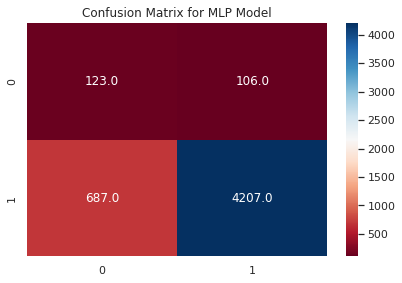

In [89]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_pred, y_test)
print(report)
cm = confusion_matrix(y_pred, y_test)
#np.set_printoptions(precision=0.01)
print("Accuracy of MLP model: {}%".format(acc*100))
sns.heatmap(cm, annot=True, fmt=".1f", cmap="RdBu")
plt.title("Confusion Matrix for MLP Model")

In [90]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = mlp.predict_proba(X_test)
pos_proba = y_pred_proba[:,1]

Text(0.5, 1.0, 'ROC Curve for MLP Classifier')

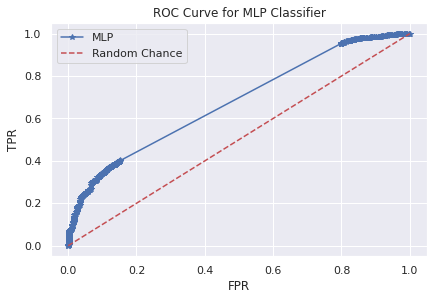

In [92]:
fpr, tpr, thresholds = roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr,"*-")
plt.plot([0,1],[0,1],'r--')
plt.legend(['MLP', 'Random Chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for MLP Classifier')
        

In [93]:
roc_auc_score(y_test, pos_proba)

0.677687324854803